<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning/blob/main/Neural_network_using_Sequential_Api_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential # 'Sequential API
from tensorflow.keras.layers import Dense #connects every neuron of the preceding layer to every neuron of current layer. It is also known as Fully connected layer.

from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

## mnist is a widely-used collection of handwritten digits designed for training and testing image classification systems. It includes 60,000 training images and 10,000 testing images, all of which are grayscale and 28×28 pixels in size.

# Load The dataset

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


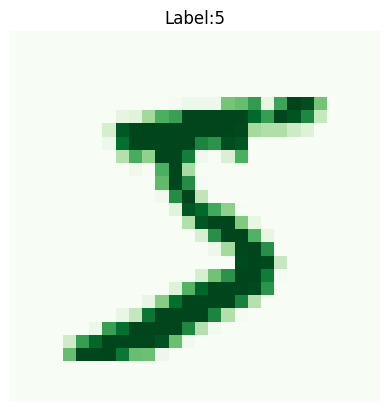

In [4]:
plt.imshow(x_train[0],cmap='Greens')
plt.title(f"Label:{y_train[0]}")
plt.axis('off')
plt.show()

# To display many numbers of image

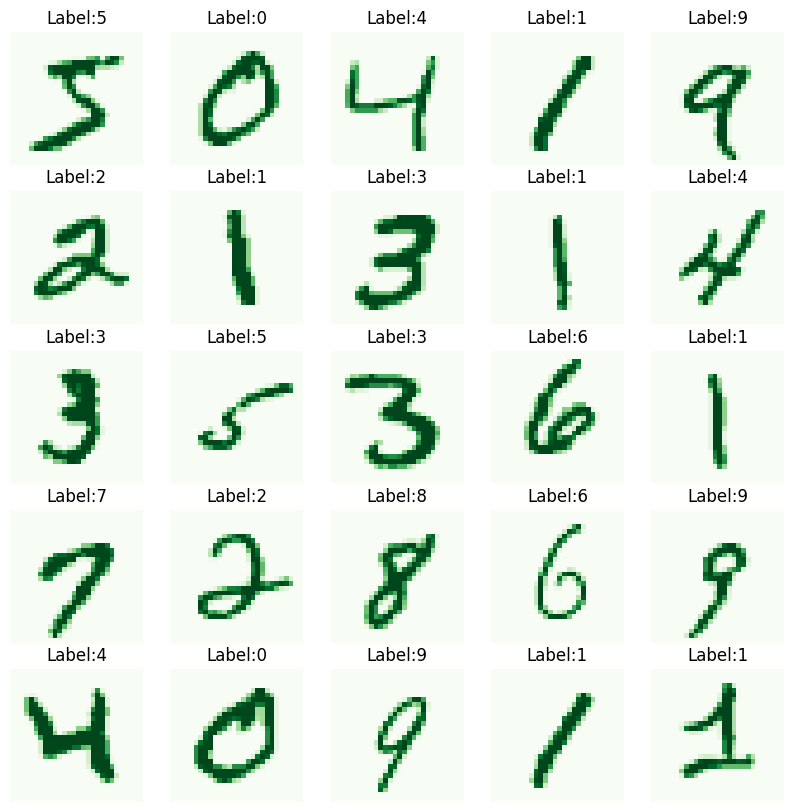

In [5]:
plt.figure(figsize=(10,10)) #figure size to 10x10 inches

for i in range(25):
  plt.subplot(5,5,i+1) # 5 rows and 5 columns
  plt.imshow(x_train[i],cmap='Greens')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.show()


# Normalization and reshaping


In [6]:
x_train=x_train.reshape(-1,28*28)/255.0
x_test=x_test.reshape(-1,28*28)/255.0

#  flattening each 28×28 image into a 1D vector of 784 features — suitable for fully connected (dense) networks.
# Normalizes the pixel values from the range [0, 255] → [0, 1].

# This helps the neural network train faster and more effectively because smaller values reduce vanishing gradients and make optimization more stable.

 # Define the neural network architecturde


In [12]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(28*28,)), #input layer
    Dense(64,activation='relu'), #hidden layer
    Dense(32,activation='relu'), # hidden layer
    Dense(10,activation='softmax') # ouput layer,,for multicklass classification ,,use softmax

])

# Compile the model

## 🧠 Loss Functions Summary Table

| Problem Type             | Output Layer           | Loss Function                     |
|--------------------------|------------------------|------------------------------------|
| Binary Classification    | Sigmoid (1 neuron)     | `BinaryCrossentropy`              |
| Multi-Class (One-hot)    | Softmax (n neurons)    | `CategoricalCrossentropy`         |
| Multi-Class (Labels)     | Softmax (n neurons)    | `SparseCategoricalCrossentropy`   |
| Multi-Label Classification | Sigmoid (n neurons)  | `BinaryCrossentropy`              |
| Regression               | Linear (1 or more)     | `MSE`, `MAE`, `Huber`             |

## Optimizer SUMMARY TABLE
## 🚀 Optimizers for Different Deep Learning Tasks

| Problem Type                     | Recommended Optimizer         | Notes                                           |
|----------------------------------|-------------------------------|-------------------------------------------------|
| Binary Classification            | `Adam`, `SGD (with momentum)` | Adam is usually faster                         |
| Multi-Class Classification       | `Adam`, `RMSprop`             | Good convergence for most image tasks          |
| Multi-Label Classification       | `Adam`, `Nadam`               | Adam handles multiple sigmoids well            |
| Regression                       | `Adam`, `SGD`                 | Depends on the problem complexity              |
| CNNs (e.g., image data)          | `Adam`, `RMSprop`             | Fast & stable learning                         |
| RNNs / LSTMs                     | `RMSprop`, `Adam`             | RMSprop works well with sequential data        |
| Transformers / BERT              | `AdamW`                       | Optimized for weight decay and generalization  |
| Sparse Data (e.g., NLP TF-IDF)   | `Adagrad`                     | Handles rare features well                     |


In [14]:
# cOMPILE THE MODEL
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
